In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

In [71]:
data = {
    'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'],
    'Age': [25, 28, 30, 35, 40, 22, 23, 21, 19, 27, 29, 200, 300, 100, 18],  # Outliers: 200, 300, 100
    'Salary': [50000, 52000, 58000, 61000, 59000, 55000, 54000, 51000, 48000, 56000, 53000, 1000000, 2000000, 120000, 45000]  # Outliers: 1000000, 2000000
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

Original Dataset:
    Name  Age   Salary
0     A   25    50000
1     B   28    52000
2     C   30    58000
3     D   35    61000
4     E   40    59000
5     F   22    55000
6     G   23    54000
7     H   21    51000
8     I   19    48000
9     J   27    56000
10    K   29    53000
11    L  200  1000000
12    M  300  2000000
13    N  100   120000
14    O   18    45000


In [72]:
df.head()

,Name,Age,Salary
0,A,25,50000
1,B,28,52000
2,C,30,58000
3,D,35,61000
4,E,40,59000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    15 non-null     object
 1   Age     15 non-null     int64 
 2   Salary  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 492.0+ bytes


In [74]:
df.describe()

,Age,Salary
count,15.000000,1.500000e+01
mean,61.133333,2.508000e+05
std,81.408903,5.415241e+05
min,18.000000,4.500000e+04
25%,22.500000,5.150000e+04
50%,28.000000,5.500000e+04
75%,37.500000,6.000000e+04
max,300.000000,2.000000e+06


In [75]:
z_scores = np.abs(stats.zscore(df[['Age', 'Salary']]))
print("Z-Scores:\n", z_scores)

threshold = 3
outliers_zscore = np.where(z_scores > threshold)
print("Outliers based on Z-score:\n", outliers_zscore)

df_zscore_cleaned = df[(z_scores < threshold).all(axis=1)]
print("\nDataset after Z-score outlier removal:\n", df_zscore_cleaned)


Z-Scores:
          Age    Salary
0   0.459428  0.383820
1   0.421284  0.379997
2   0.395854  0.368528
3   0.332280  0.362794
4   0.268706  0.366617
5   0.497573  0.374263
6   0.484858  0.376174
7   0.510288  0.381909
8   0.535717  0.387643
9   0.433999  0.372351
10  0.408569  0.378086
11  1.765663  1.432061
12  3.037143  3.343515
13  0.494182  0.250018
14  0.548432  0.393377
Outliers based on Z-score:
 (array([12, 12], dtype=int64), array([0, 1], dtype=int64))

Dataset after Z-score outlier removal:
    Name  Age   Salary
0     A   25    50000
1     B   28    52000
2     C   30    58000
3     D   35    61000
4     E   40    59000
5     F   22    55000
6     G   23    54000
7     H   21    51000
8     I   19    48000
9     J   27    56000
10    K   29    53000
11    L  200  1000000
13    N  100   120000
14    O   18    45000


In [76]:
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)

# Detecting outliers
outliers_iqr = ((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Outliers based on IQR:\n", df[outliers_iqr])

# Remove outliers
df_iqr_cleaned = df[~outliers_iqr]
print("\nDataset after IQR outlier removal:\n", df_iqr_cleaned)



Q1:
 Age          22.5
Salary    51500.0
Name: 0.25, dtype: float64
Q3:
 Age          37.5
Salary    60000.0
Name: 0.75, dtype: float64
IQR:
 Age         15.0
Salary    8500.0
dtype: float64
Outliers based on IQR:
    Name  Age   Salary
11    L  200  1000000
12    M  300  2000000
13    N  100   120000

Dataset after IQR outlier removal:
    Name  Age  Salary
0     A   25   50000
1     B   28   52000
2     C   30   58000
3     D   35   61000
4     E   40   59000
5     F   22   55000
6     G   23   54000
7     H   21   51000
8     I   19   48000
9     J   27   56000
10    K   29   53000
14    O   18   45000


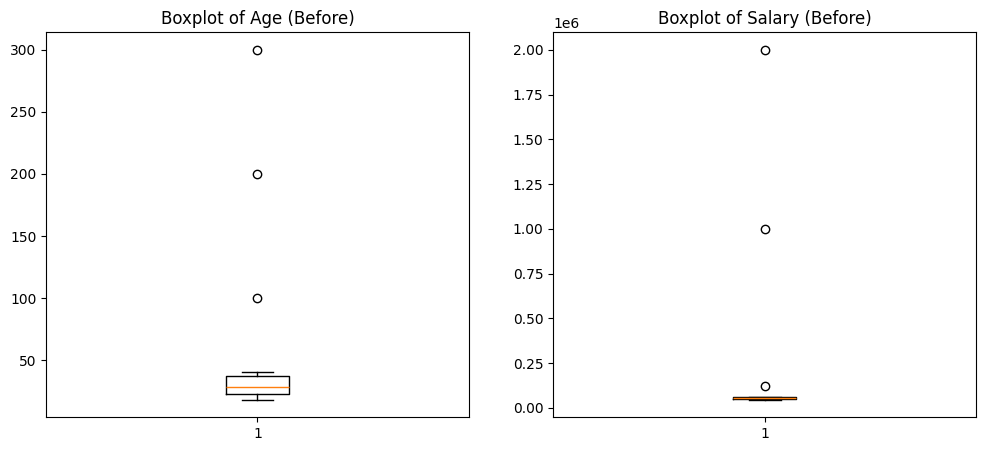

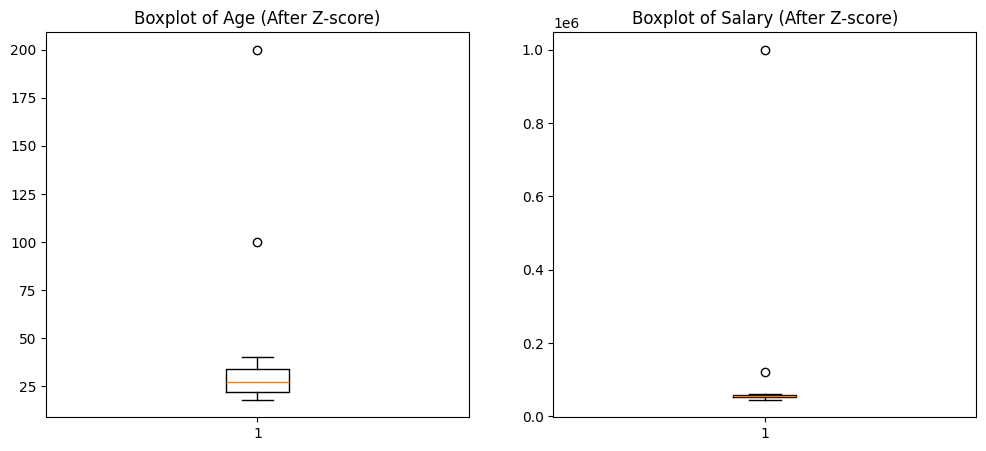

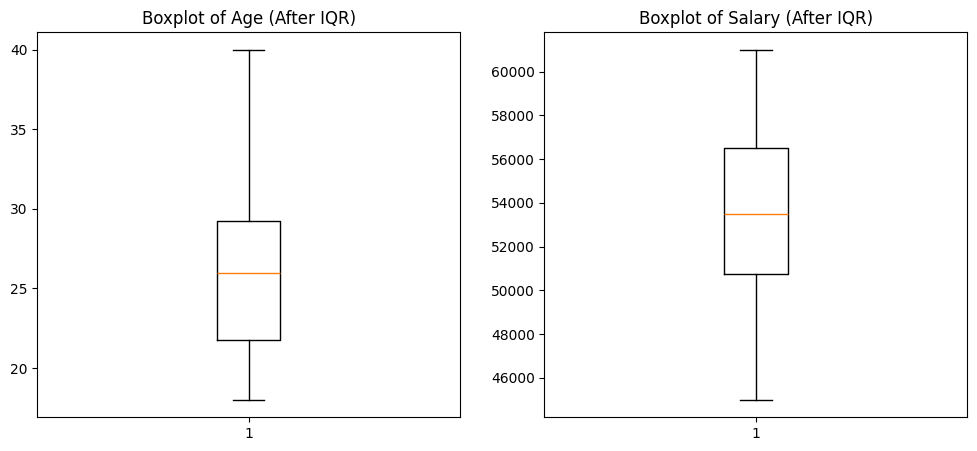

In [77]:
# Before removing outliers (Original data)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title("Boxplot of Age (Before)")

plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'])
plt.title("Boxplot of Salary (Before)")

plt.show()

# After removing outliers (Z-score method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df_zscore_cleaned['Age'])
plt.title("Boxplot of Age (After Z-score)")

plt.subplot(1, 2, 2)
plt.boxplot(df_zscore_cleaned['Salary'])
plt.title("Boxplot of Salary (After Z-score)")

plt.show()

# After removing outliers (IQR method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df_iqr_cleaned['Age'])
plt.title("Boxplot of Age (After IQR)")

plt.subplot(1, 2, 2)
plt.boxplot(df_iqr_cleaned['Salary'])
plt.title("Boxplot of Salary (After IQR)")

plt.show()